# Demo of the GTM Magic Analysis for Classification

In this demonstration we show how we chose sensible degrees for the marginal transformations of the GTM based on a simple heuristic test.
The issue is that larger degrees increase compute time and the requirement for good penalisation to avoid overfitting, while too small degrees mean that the model may not be flexible enough. 
Hence we want to strike a sensible balance.

## Heuristic Approach

below we run the method `find_minimal_transformation_degrees` for both a GTM on the Hadron and Gamma class.
The method goes through each dimension of the data sequentially and trains 1-Dimensional Transformation Models with increasing degrees.
It starts with the smallest degreee in the arguement `degrees_try_list`and once the model has converged it tests whether the latent space is Gaussian with a [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).
If the null hypothesis is not rejected at a P-value of 0.05, then we conclude that the current degree is enough to overfit the marginal, store it and move on to the next data dimension. If the null hypothesis is rejected then we take the next larger degree in the list and retrain the model.
That way we get custom varyng degrees depending on the complexity of the marginals.

`find_minimal_transformation_degrees` plots the transformed marginals once the required degree is achieved.

We use the optimal degrees when training our models in the [training script](demos/train_gtm_magic.py).

In [1]:
# GTM Package including GTM and the plot functions
from gtm import *

import os
from torch.utils.data import DataLoader

from demos.load_analyze_magic_data_helpers import *
from demos.dataset_helpers import Generic_Dataset

/Users/matthiasherp/anaconda3/envs/mctm_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# got up one directory as new working directory so that loading data works
# only run this once
os.chdir(os.path.dirname(os.getcwd()))

#### Defining a generic Model to run testing with

In [3]:
model = GTM(
    number_variables=10, spline_decorrelation="bspline", spline_transformation="bspline"
)

## Group Hadron

In [4]:
group = "h"

y_train, y_validate, y_test = load_magic_data(
    group=group,
    train_portion=2 / 3,
    data_dims=10,
    poly_span_abs=12,
    cross_validation_folds=5,
    validation_fold_index=4,
    split_random_state=25,
)
N_train = y_train.size(0)
N_validate = y_validate.size(0)

# Create dataset and DataLoader
dataset_train = Generic_Dataset(y_train)
dataloader_train = DataLoader(dataset_train, batch_size=N_train)
dataset_validate = Generic_Dataset(y_validate)
dataloader_validate = DataLoader(dataset_validate, batch_size=N_validate)

Starting run for data dim  0  with degrees of  5


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/matthiasherp/Desktop/phd_github_repositories/gtm/gtm/gtm_splines/bspline_prediction_vectorized.py:526: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  t=knots.T,
 10%|▉         | 99/1000 [00:01<00:14, 64.08it/s]


Starting run for data dim  0  with degrees of  10


 14%|█▍        | 141/1000 [00:02<00:12, 67.47it/s]


Starting run for data dim  0  with degrees of  15


 14%|█▎        | 136/1000 [00:02<00:12, 66.91it/s]


Starting run for data dim  0  with degrees of  20


 23%|██▎       | 233/1000 [00:03<00:11, 66.31it/s]

pvalue is  0.885922908782959  for data dim  0  with degrees of  20


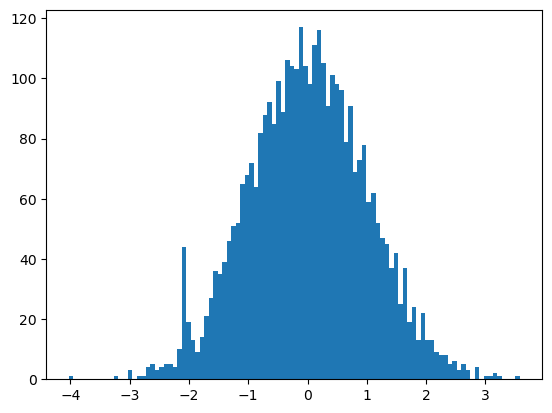

Starting run for data dim  1  with degrees of  5


  8%|▊         | 82/1000 [00:01<00:16, 54.40it/s]


Starting run for data dim  1  with degrees of  10


 11%|█         | 110/1000 [00:02<00:18, 48.88it/s]


Starting run for data dim  1  with degrees of  15


 14%|█▍        | 144/1000 [00:02<00:13, 63.03it/s]


Starting run for data dim  1  with degrees of  20


 16%|█▌        | 161/1000 [00:02<00:12, 66.68it/s]


Starting run for data dim  1  with degrees of  25


 16%|█▌        | 161/1000 [00:02<00:12, 65.62it/s]


Starting run for data dim  1  with degrees of  30


 23%|██▎       | 232/1000 [00:03<00:11, 66.80it/s]


Starting run for data dim  1  with degrees of  35


 21%|██        | 211/1000 [00:03<00:11, 68.28it/s]


pvalue is  0.05658672749996185  for data dim  1  with degrees of  35


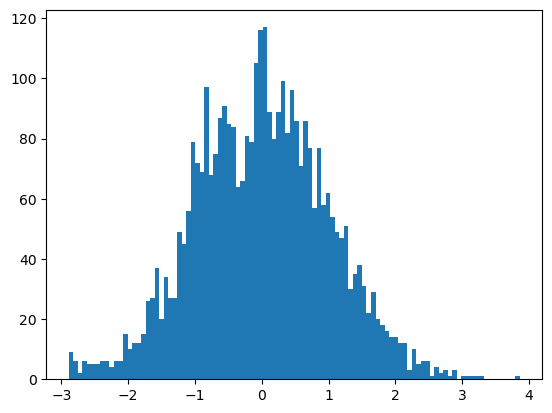

Starting run for data dim  2  with degrees of  5


 14%|█▎        | 137/1000 [00:02<00:16, 53.77it/s]


Starting run for data dim  2  with degrees of  10


 16%|█▌        | 161/1000 [00:02<00:13, 62.35it/s]


pvalue is  0.7506911158561707  for data dim  2  with degrees of  10


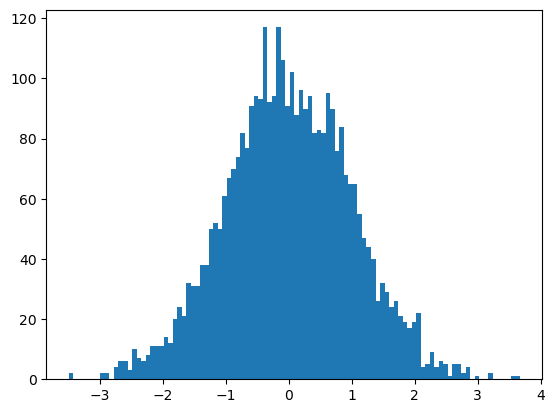

Starting run for data dim  3  with degrees of  5


 18%|█▊        | 181/1000 [00:02<00:12, 66.44it/s]


Starting run for data dim  3  with degrees of  10


 12%|█▎        | 125/1000 [00:01<00:13, 65.08it/s]


pvalue is  0.6626675128936768  for data dim  3  with degrees of  10


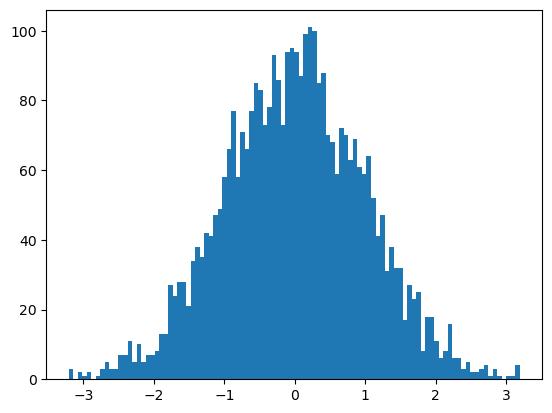

Starting run for data dim  4  with degrees of  5


 15%|█▌        | 153/1000 [00:02<00:14, 59.83it/s]


Starting run for data dim  4  with degrees of  10


 10%|▉         | 99/1000 [00:01<00:14, 61.47it/s]

pvalue is  0.6114955544471741  for data dim  4  with degrees of  10


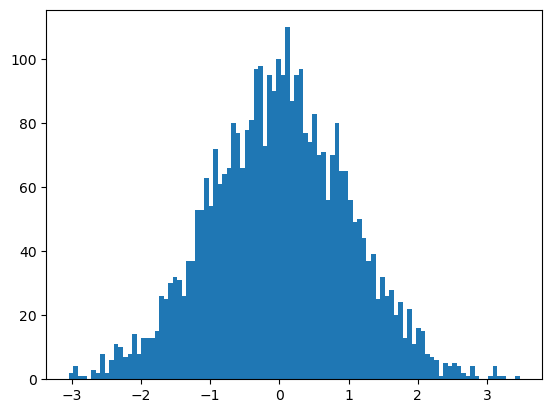

Starting run for data dim  5  with degrees of  5


  8%|▊         | 85/1000 [00:01<00:20, 44.87it/s]


Starting run for data dim  5  with degrees of  10


 21%|██        | 212/1000 [00:03<00:11, 67.78it/s]


Starting run for data dim  5  with degrees of  15


 19%|█▊        | 186/1000 [00:02<00:12, 63.91it/s]


Starting run for data dim  5  with degrees of  20


 21%|██        | 207/1000 [00:03<00:11, 68.08it/s]


Starting run for data dim  5  with degrees of  25


 26%|██▋       | 263/1000 [00:04<00:12, 57.51it/s]


Starting run for data dim  5  with degrees of  30


 25%|██▌       | 251/1000 [00:03<00:11, 65.71it/s]

pvalue is  0.88458651304245  for data dim  5  with degrees of  30


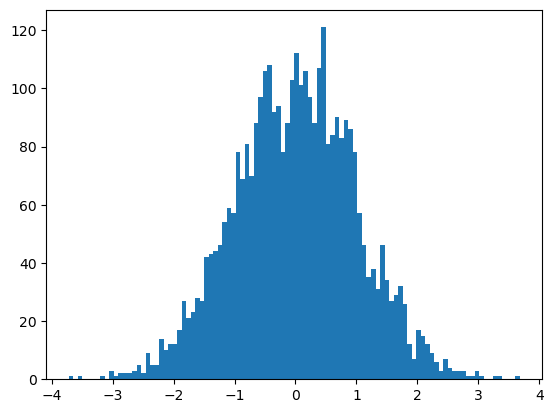

Starting run for data dim  6  with degrees of  5


  7%|▋         | 69/1000 [00:01<00:16, 57.46it/s]


Starting run for data dim  6  with degrees of  10


 17%|█▋        | 168/1000 [00:02<00:13, 60.83it/s]


Starting run for data dim  6  with degrees of  15


 18%|█▊        | 185/1000 [00:02<00:12, 64.21it/s]


Starting run for data dim  6  with degrees of  20


 26%|██▌       | 256/1000 [00:04<00:13, 56.05it/s]


Starting run for data dim  6  with degrees of  25


 24%|██▎       | 235/1000 [00:03<00:11, 64.41it/s]


Starting run for data dim  6  with degrees of  30


 28%|██▊       | 277/1000 [00:04<00:12, 56.46it/s]

pvalue is  0.363103985786438  for data dim  6  with degrees of  30


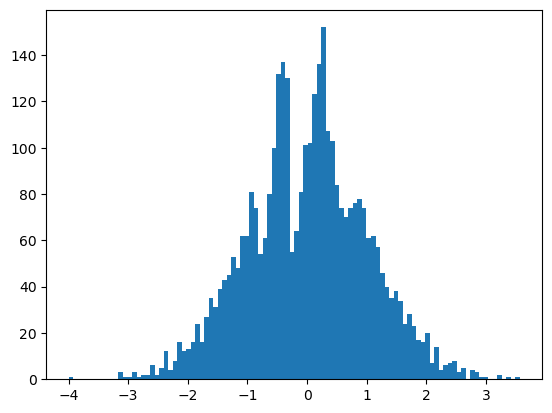

Starting run for data dim  7  with degrees of  5


 10%|▉         | 98/1000 [00:01<00:15, 58.20it/s]


Starting run for data dim  7  with degrees of  10


 24%|██▍       | 241/1000 [00:03<00:11, 66.28it/s]


Starting run for data dim  7  with degrees of  15


 16%|█▌        | 157/1000 [00:02<00:13, 64.20it/s]


Starting run for data dim  7  with degrees of  20


 21%|██        | 209/1000 [00:03<00:15, 52.51it/s]


Starting run for data dim  7  with degrees of  25


 21%|██        | 212/1000 [00:03<00:14, 53.39it/s]


Starting run for data dim  7  with degrees of  30


 17%|█▋        | 167/1000 [00:04<00:20, 41.18it/s]


Starting run for data dim  7  with degrees of  35


 17%|█▋        | 166/1000 [00:03<00:16, 49.08it/s]


Starting run for data dim  7  with degrees of  40


 20%|█▉        | 199/1000 [00:05<00:22, 36.25it/s]

pvalue is  0.21810530126094818  for data dim  7  with degrees of  40


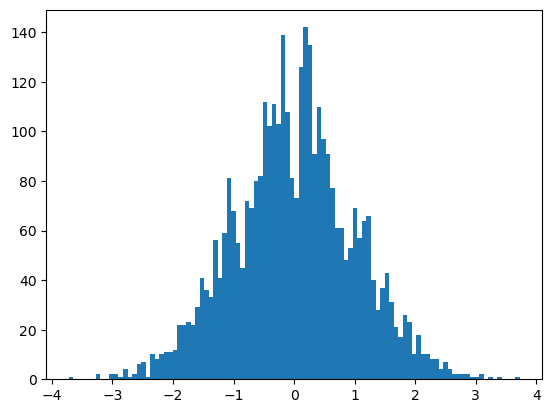

Starting run for data dim  8  with degrees of  5


 29%|██▉       | 290/1000 [00:05<00:12, 55.56it/s]


Starting run for data dim  8  with degrees of  10


  8%|▊         | 81/1000 [00:01<00:18, 50.76it/s]


Starting run for data dim  8  with degrees of  15


 28%|██▊       | 275/1000 [00:05<00:15, 47.83it/s]


Starting run for data dim  8  with degrees of  20


 10%|▉         | 97/1000 [00:02<00:21, 41.52it/s]


Starting run for data dim  8  with degrees of  25


 31%|███       | 307/1000 [00:06<00:13, 50.78it/s]


Starting run for data dim  8  with degrees of  30


 15%|█▍        | 147/1000 [00:02<00:12, 65.80it/s]


pvalue is  0.05477854609489441  for data dim  8  with degrees of  30


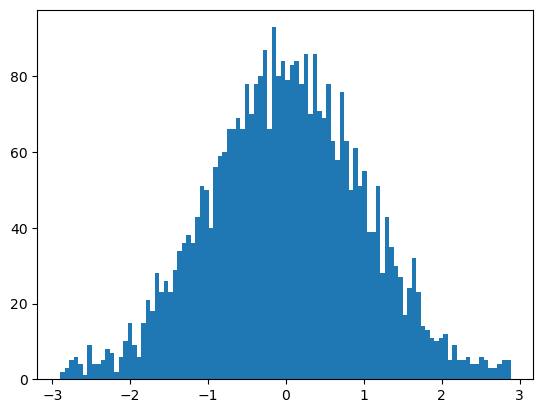

Starting run for data dim  9  with degrees of  5


  7%|▋         | 69/1000 [00:01<00:13, 67.97it/s]


Starting run for data dim  9  with degrees of  10


 15%|█▌        | 154/1000 [00:02<00:12, 65.42it/s]


pvalue is  0.8692807555198669  for data dim  9  with degrees of  10


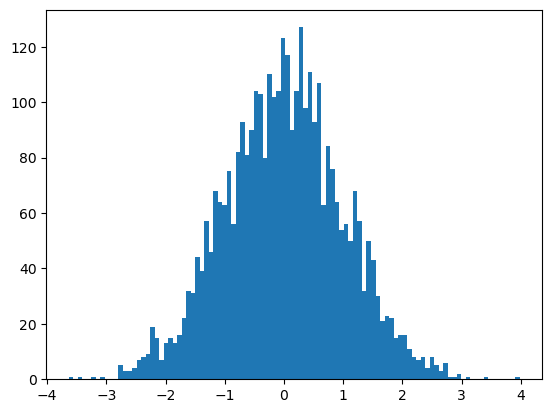

In [5]:
(
    optimal_degrees_transformation_group_h,
    optimal_degrees_transformation_pvalues_group_h,
) = model.find_minimal_transformation_degrees(
    train_dataloader=dataloader_train,
    iterations=1000,
    degrees_try_list=list(range(5, 155, 5)),
    max_batches_per_iter=False,
)

In [6]:
optimal_degrees_transformation_group_h

[20, 35, 10, 10, 10, 30, 30, 40, 30, 10]

## Group Gamma

In [7]:
group = "g"

y_train, y_validate, y_test = load_magic_data(
    group=group,
    train_portion=2 / 3,
    data_dims=10,
    poly_span_abs=12,
    cross_validation_folds=5,
    validation_fold_index=4,
    split_random_state=25,
)
N_train = y_train.size(0)
N_validate = y_validate.size(0)

# Create dataset and DataLoader
dataset_train = Generic_Dataset(y_train)
dataloader_train = DataLoader(dataset_train, batch_size=N_train)
dataset_validate = Generic_Dataset(y_validate)
dataloader_validate = DataLoader(dataset_validate, batch_size=N_validate)

Starting run for data dim  0  with degrees of  5


  4%|▍         | 41/1000 [00:01<00:23, 40.62it/s]


Starting run for data dim  0  with degrees of  10


 20%|██        | 202/1000 [00:05<00:23, 33.89it/s]


Starting run for data dim  0  with degrees of  15


 17%|█▋        | 167/1000 [00:04<00:20, 40.15it/s]


Starting run for data dim  0  with degrees of  20


 24%|██▍       | 245/1000 [00:06<00:20, 37.27it/s]


Starting run for data dim  0  with degrees of  25


 26%|██▌       | 256/1000 [00:06<00:18, 39.33it/s]


Starting run for data dim  0  with degrees of  30


 21%|██        | 211/1000 [00:05<00:22, 35.43it/s]


Starting run for data dim  0  with degrees of  35


 22%|██▏       | 216/1000 [00:05<00:20, 38.08it/s]


Starting run for data dim  0  with degrees of  40


 38%|███▊      | 376/1000 [00:10<00:17, 36.34it/s]


Starting run for data dim  0  with degrees of  45


 26%|██▌       | 259/1000 [00:07<00:20, 36.16it/s]


Starting run for data dim  0  with degrees of  50


 14%|█▎        | 135/1000 [00:03<00:22, 38.30it/s]


Starting run for data dim  0  with degrees of  55


 65%|██████▌   | 653/1000 [00:17<00:09, 36.64it/s]


Starting run for data dim  0  with degrees of  60


 26%|██▌       | 255/1000 [00:06<00:19, 38.52it/s]


Starting run for data dim  0  with degrees of  65


 17%|█▋        | 174/1000 [00:05<00:24, 34.25it/s]


Starting run for data dim  0  with degrees of  70


 33%|███▎      | 331/1000 [00:09<00:19, 34.82it/s]


Starting run for data dim  0  with degrees of  75


 31%|███       | 311/1000 [00:08<00:19, 34.89it/s]


Starting run for data dim  0  with degrees of  80


 63%|██████▎   | 627/1000 [00:17<00:10, 36.65it/s]


Starting run for data dim  0  with degrees of  85


 24%|██▍       | 241/1000 [00:07<00:23, 32.91it/s]


Starting run for data dim  0  with degrees of  90


 28%|██▊       | 276/1000 [00:07<00:20, 34.58it/s]


Starting run for data dim  0  with degrees of  95


 45%|████▍     | 446/1000 [00:12<00:15, 36.00it/s]


Starting run for data dim  0  with degrees of  100


 43%|████▎     | 433/1000 [00:12<00:15, 36.01it/s]


Starting run for data dim  0  with degrees of  105


100%|██████████| 1000/1000 [00:27<00:00, 36.50it/s]


Starting run for data dim  0  with degrees of  110


 19%|█▊        | 187/1000 [00:05<00:25, 32.28it/s]


Starting run for data dim  0  with degrees of  115


 27%|██▋       | 271/1000 [00:07<00:21, 34.18it/s]


Starting run for data dim  0  with degrees of  120


 56%|█████▌    | 560/1000 [00:16<00:13, 33.76it/s]


Starting run for data dim  0  with degrees of  125


 28%|██▊       | 282/1000 [00:08<00:21, 34.15it/s]


Starting run for data dim  0  with degrees of  130


 55%|█████▍    | 548/1000 [00:15<00:12, 34.84it/s]


Starting run for data dim  0  with degrees of  135


 33%|███▎      | 331/1000 [00:10<00:21, 31.81it/s]


Starting run for data dim  0  with degrees of  140


 23%|██▎       | 227/1000 [00:07<00:24, 31.52it/s]


Starting run for data dim  0  with degrees of  145


 59%|█████▉    | 594/1000 [00:17<00:11, 34.87it/s]

pvalue is  0.11883100867271423  for data dim  0  with degrees of  145


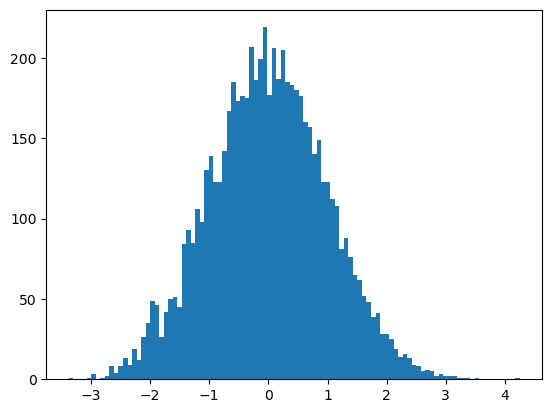

Starting run for data dim  1  with degrees of  5


  7%|▋         | 72/1000 [00:02<00:30, 30.58it/s]


Starting run for data dim  1  with degrees of  10


 24%|██▍       | 238/1000 [00:05<00:18, 40.72it/s]


Starting run for data dim  1  with degrees of  15


 18%|█▊        | 179/1000 [00:05<00:23, 34.38it/s]


Starting run for data dim  1  with degrees of  20


 14%|█▎        | 135/1000 [00:03<00:22, 37.75it/s]


Starting run for data dim  1  with degrees of  25


 16%|█▋        | 163/1000 [00:04<00:24, 33.77it/s]


Starting run for data dim  1  with degrees of  30


 35%|███▍      | 346/1000 [00:09<00:17, 36.55it/s]


Starting run for data dim  1  with degrees of  35


 23%|██▎       | 230/1000 [00:06<00:20, 36.70it/s]


Starting run for data dim  1  with degrees of  40


 22%|██▏       | 216/1000 [00:05<00:20, 38.32it/s]


Starting run for data dim  1  with degrees of  45


 25%|██▌       | 250/1000 [00:07<00:21, 35.34it/s]


Starting run for data dim  1  with degrees of  50


 23%|██▎       | 227/1000 [00:06<00:21, 35.27it/s]


Starting run for data dim  1  with degrees of  55


 34%|███▎      | 337/1000 [00:09<00:17, 36.99it/s]


Starting run for data dim  1  with degrees of  60


 23%|██▎       | 231/1000 [00:05<00:19, 38.79it/s]


Starting run for data dim  1  with degrees of  65


 29%|██▊       | 287/1000 [00:07<00:19, 36.17it/s]


Starting run for data dim  1  with degrees of  70


 32%|███▏      | 318/1000 [00:09<00:19, 34.66it/s]


Starting run for data dim  1  with degrees of  75


 32%|███▏      | 321/1000 [00:09<00:19, 35.08it/s]


Starting run for data dim  1  with degrees of  80


 29%|██▉       | 288/1000 [00:08<00:20, 34.90it/s]


Starting run for data dim  1  with degrees of  85


 31%|███       | 309/1000 [00:09<00:20, 34.09it/s]


Starting run for data dim  1  with degrees of  90


 38%|███▊      | 385/1000 [00:11<00:18, 33.09it/s]


Starting run for data dim  1  with degrees of  95


 30%|███       | 302/1000 [00:08<00:19, 34.95it/s]


Starting run for data dim  1  with degrees of  100


 30%|██▉       | 298/1000 [00:08<00:20, 34.25it/s]


Starting run for data dim  1  with degrees of  105


 38%|███▊      | 375/1000 [00:10<00:17, 35.19it/s]


Starting run for data dim  1  with degrees of  110


 32%|███▏      | 322/1000 [00:09<00:19, 34.01it/s]


Starting run for data dim  1  with degrees of  115


 36%|███▌      | 357/1000 [00:10<00:19, 32.48it/s]


Starting run for data dim  1  with degrees of  120


 30%|███       | 303/1000 [00:08<00:20, 34.01it/s]


Starting run for data dim  1  with degrees of  125


 34%|███▍      | 339/1000 [00:09<00:18, 34.95it/s]


Starting run for data dim  1  with degrees of  130


 26%|██▌       | 257/1000 [00:08<00:23, 31.71it/s]


Starting run for data dim  1  with degrees of  135


 32%|███▏      | 322/1000 [00:09<00:20, 33.88it/s]


Starting run for data dim  1  with degrees of  140


 26%|██▋       | 264/1000 [00:07<00:22, 33.06it/s]


Starting run for data dim  1  with degrees of  145


 26%|██▌       | 256/1000 [00:07<00:21, 34.84it/s]


Starting run for data dim  1  with degrees of  150


 43%|████▎     | 429/1000 [00:13<00:17, 32.51it/s]


Starting run for data dim  2  with degrees of  5


 24%|██▍       | 239/1000 [00:06<00:19, 38.59it/s]


Starting run for data dim  2  with degrees of  10


 13%|█▎        | 129/1000 [00:03<00:25, 33.73it/s]


pvalue is  0.061264581978321075  for data dim  2  with degrees of  10


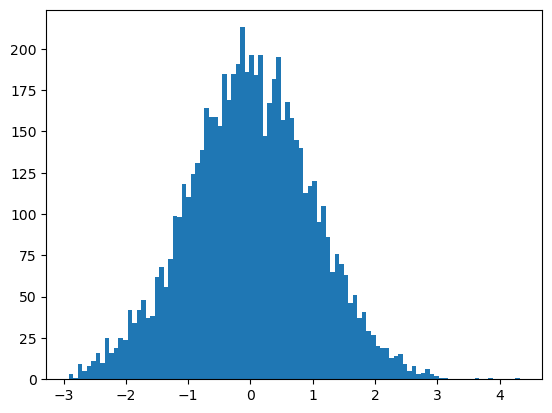

Starting run for data dim  3  with degrees of  5


 17%|█▋        | 168/1000 [00:04<00:22, 37.80it/s]


Starting run for data dim  3  with degrees of  10


  7%|▋         | 68/1000 [00:01<00:23, 39.32it/s]

pvalue is  0.5060123801231384  for data dim  3  with degrees of  10


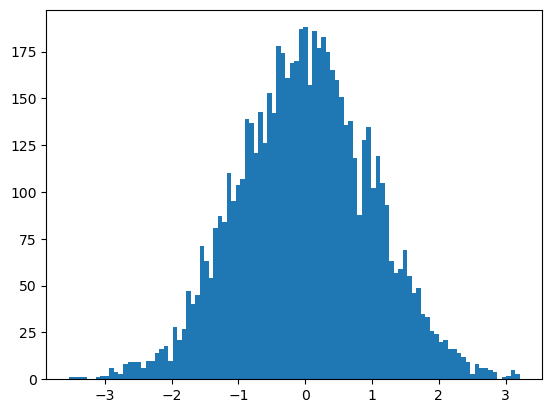

Starting run for data dim  4  with degrees of  5


  5%|▍         | 49/1000 [00:01<00:34, 27.32it/s]


Starting run for data dim  4  with degrees of  10


  8%|▊         | 81/1000 [00:02<00:23, 38.77it/s]

pvalue is  0.197763130068779  for data dim  4  with degrees of  10


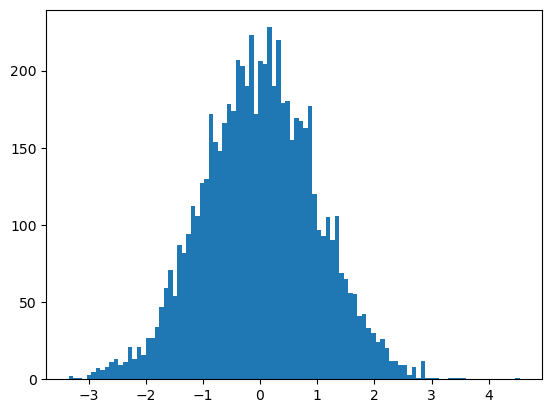

Starting run for data dim  5  with degrees of  5


 14%|█▍        | 138/1000 [00:03<00:22, 38.69it/s]


Starting run for data dim  5  with degrees of  10


 12%|█▏        | 116/1000 [00:03<00:26, 33.43it/s]


Starting run for data dim  5  with degrees of  15


 33%|███▎      | 330/1000 [00:08<00:17, 37.78it/s]


Starting run for data dim  5  with degrees of  20


 18%|█▊        | 185/1000 [00:04<00:20, 40.34it/s]


Starting run for data dim  5  with degrees of  25


 26%|██▌       | 257/1000 [00:07<00:20, 36.23it/s]


Starting run for data dim  5  with degrees of  30


 28%|██▊       | 277/1000 [00:07<00:20, 36.04it/s]


pvalue is  0.24752867221832275  for data dim  5  with degrees of  30


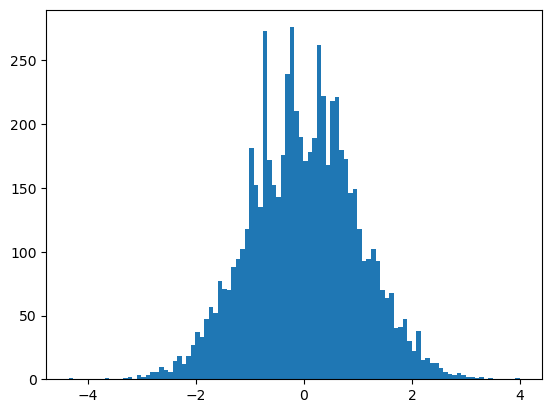

Starting run for data dim  6  with degrees of  5


 17%|█▋        | 166/1000 [00:04<00:21, 38.75it/s]


Starting run for data dim  6  with degrees of  10


 10%|█         | 104/1000 [00:03<00:27, 32.99it/s]


Starting run for data dim  6  with degrees of  15


 10%|█         | 101/1000 [00:02<00:22, 40.19it/s]


Starting run for data dim  6  with degrees of  20


 15%|█▌        | 151/1000 [00:04<00:24, 34.35it/s]


Starting run for data dim  6  with degrees of  25


 17%|█▋        | 173/1000 [00:04<00:21, 38.87it/s]


Starting run for data dim  6  with degrees of  30


 21%|██        | 212/1000 [00:05<00:21, 36.04it/s]


Starting run for data dim  6  with degrees of  35


 28%|██▊       | 284/1000 [00:07<00:19, 36.48it/s]


Starting run for data dim  6  with degrees of  40


 22%|██▎       | 225/1000 [00:06<00:21, 35.57it/s]


Starting run for data dim  6  with degrees of  45


 23%|██▎       | 229/1000 [00:05<00:20, 38.50it/s]


Starting run for data dim  6  with degrees of  50


 25%|██▍       | 248/1000 [00:07<00:21, 34.35it/s]


Starting run for data dim  6  with degrees of  55


 26%|██▌       | 256/1000 [00:07<00:21, 35.17it/s]


pvalue is  0.1319601684808731  for data dim  6  with degrees of  55


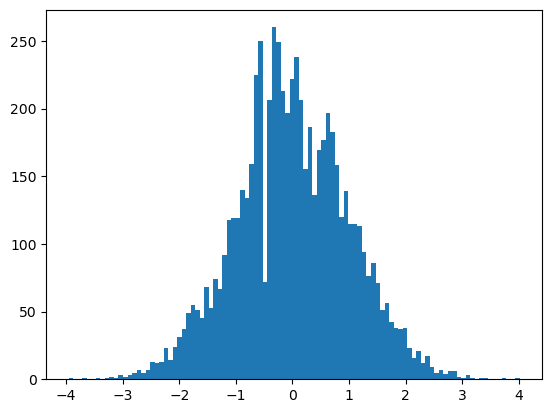

Starting run for data dim  7  with degrees of  5


  5%|▍         | 49/1000 [00:02<00:39, 24.38it/s]


Starting run for data dim  7  with degrees of  10


 16%|█▌        | 156/1000 [00:04<00:22, 37.01it/s]


Starting run for data dim  7  with degrees of  15


 11%|█▏        | 113/1000 [00:03<00:27, 32.41it/s]


Starting run for data dim  7  with degrees of  20


 24%|██▎       | 236/1000 [00:06<00:19, 38.44it/s]


Starting run for data dim  7  with degrees of  25


 18%|█▊        | 176/1000 [00:05<00:24, 33.96it/s]


Starting run for data dim  7  with degrees of  30


 27%|██▋       | 272/1000 [00:07<00:20, 36.23it/s]


Starting run for data dim  7  with degrees of  35


 19%|█▉        | 190/1000 [00:05<00:23, 33.90it/s]


Starting run for data dim  7  with degrees of  40


 22%|██▏       | 224/1000 [00:06<00:21, 35.33it/s]


Starting run for data dim  7  with degrees of  45


 21%|██▏       | 214/1000 [00:06<00:22, 35.52it/s]


Starting run for data dim  7  with degrees of  50


 26%|██▌       | 259/1000 [00:07<00:20, 35.76it/s]


Starting run for data dim  7  with degrees of  55


 24%|██▍       | 245/1000 [00:07<00:21, 34.67it/s]


Starting run for data dim  7  with degrees of  60


 28%|██▊       | 276/1000 [00:08<00:21, 33.54it/s]

pvalue is  0.6277609467506409  for data dim  7  with degrees of  60


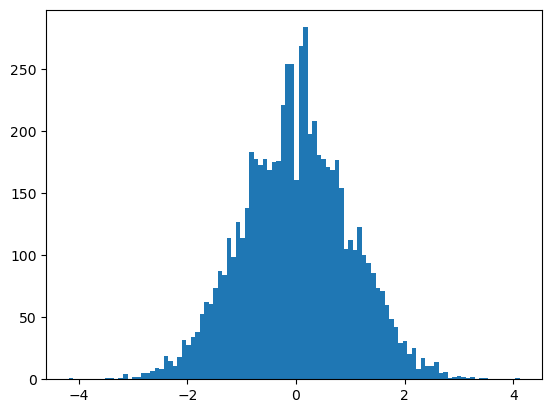

Starting run for data dim  8  with degrees of  5


 22%|██▏       | 218/1000 [00:06<00:21, 36.04it/s]


Starting run for data dim  8  with degrees of  10


 10%|█         | 103/1000 [00:03<00:27, 32.34it/s]


Starting run for data dim  8  with degrees of  15


 44%|████▎     | 436/1000 [00:12<00:15, 36.03it/s]


Starting run for data dim  8  with degrees of  20


 14%|█▎        | 137/1000 [00:03<00:24, 35.00it/s]


Starting run for data dim  8  with degrees of  25


 39%|███▉      | 392/1000 [00:11<00:17, 34.37it/s]


Starting run for data dim  8  with degrees of  30


  8%|▊         | 81/1000 [00:02<00:25, 35.89it/s]


Starting run for data dim  8  with degrees of  35


 30%|███       | 303/1000 [00:08<00:19, 35.47it/s]


Starting run for data dim  8  with degrees of  40


 19%|█▉        | 188/1000 [00:05<00:24, 33.58it/s]


Starting run for data dim  8  with degrees of  45


 48%|████▊     | 480/1000 [00:13<00:14, 35.42it/s]


Starting run for data dim  8  with degrees of  50


 20%|██        | 200/1000 [00:05<00:21, 37.63it/s]


Starting run for data dim  8  with degrees of  55


 60%|█████▉    | 596/1000 [00:17<00:11, 33.91it/s]


Starting run for data dim  8  with degrees of  60


 17%|█▋        | 169/1000 [00:05<00:26, 31.60it/s]


Starting run for data dim  8  with degrees of  65


 43%|████▎     | 434/1000 [00:11<00:15, 36.52it/s]


Starting run for data dim  8  with degrees of  70


 20%|██        | 202/1000 [00:06<00:23, 33.60it/s]


Starting run for data dim  8  with degrees of  75


 40%|███▉      | 395/1000 [00:11<00:17, 35.07it/s]


Starting run for data dim  8  with degrees of  80


 17%|█▋        | 168/1000 [00:05<00:26, 31.50it/s]


Starting run for data dim  8  with degrees of  85


 38%|███▊      | 379/1000 [00:10<00:17, 34.90it/s]


Starting run for data dim  8  with degrees of  90


 17%|█▋        | 172/1000 [00:05<00:25, 32.59it/s]


Starting run for data dim  8  with degrees of  95


 52%|█████▏    | 522/1000 [00:15<00:14, 34.01it/s]


Starting run for data dim  8  with degrees of  100


 17%|█▋        | 167/1000 [00:05<00:25, 32.11it/s]


Starting run for data dim  8  with degrees of  105


 40%|███▉      | 397/1000 [00:11<00:17, 34.58it/s]


Starting run for data dim  8  with degrees of  110


 18%|█▊        | 183/1000 [00:05<00:26, 30.90it/s]


Starting run for data dim  8  with degrees of  115


 27%|██▋       | 268/1000 [00:08<00:21, 33.28it/s]


Starting run for data dim  8  with degrees of  120


 23%|██▎       | 231/1000 [00:06<00:22, 33.44it/s]


Starting run for data dim  8  with degrees of  125


 32%|███▎      | 325/1000 [00:09<00:20, 33.53it/s]


Starting run for data dim  8  with degrees of  130


 20%|█▉        | 197/1000 [00:06<00:26, 30.82it/s]


Starting run for data dim  8  with degrees of  135


 33%|███▎      | 327/1000 [00:09<00:20, 33.25it/s]


Starting run for data dim  8  with degrees of  140


 19%|█▉        | 192/1000 [00:05<00:25, 32.19it/s]


Starting run for data dim  8  with degrees of  145


 34%|███▍      | 345/1000 [00:10<00:20, 32.29it/s]


pvalue is  0.05313871055841446  for data dim  8  with degrees of  145


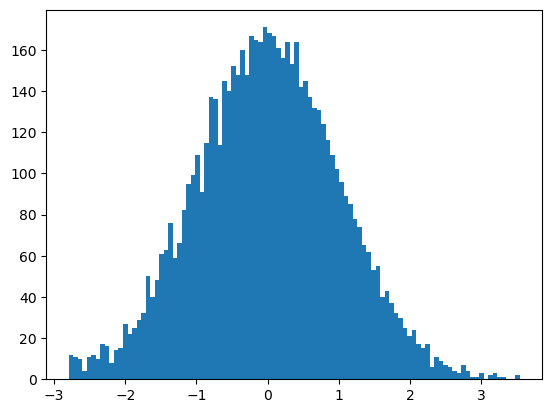

Starting run for data dim  9  with degrees of  5


 11%|█▏        | 114/1000 [00:03<00:26, 32.85it/s]


Starting run for data dim  9  with degrees of  10


  8%|▊         | 85/1000 [00:02<00:23, 38.15it/s]


pvalue is  0.9608170986175537  for data dim  9  with degrees of  10


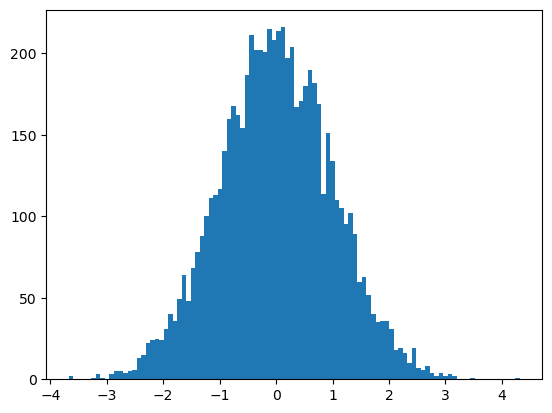

In [9]:
(
    optimal_degrees_transformation_group_g,
    optimal_degrees_transformation_pvalues_group_g,
) = model.find_minimal_transformation_degrees(
    dataloader_train,
    iterations=1000,
    degrees_try_list=list(range(5, 155, 5)),
    max_batches_per_iter=False,
)

In [ ]:
optimal_degrees_transformation_group_g

[145, 150, 15, 5, 10, 30, 55, 60, 150, 10]